In [15]:
import wrf
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units

In [37]:
wrfin = Dataset("wrfdata\\wrfout_d02_2022-11-18_18-00-00")
lat_point = 42.825
lon_point = -86.402
x_index, y_index = wrf.ll_to_xy(wrfin, lat_point, lon_point)

## **E-FIELD PLOT**

In [42]:
z = wrf.getvar(wrfin, "z", timeidx=0)[:, x_index, y_index] * units.meter
EFIELD = wrf.getvar(wrfin, "ELECMAG", timeidx=0)[:, x_index, y_index] # * units.?????

(0.0, 7500.0)

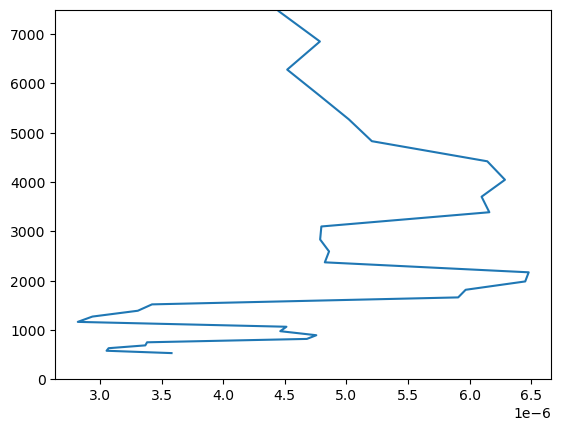

In [43]:
fig = plt.figure()

plt.plot(EFIELD,z)

ax = plt.gca()
ax.set_ylim([0, 7500])

## **SKEW-T PLOT**

In [40]:
p = wrf.getvar(wrfin, "pressure", timeidx=0)[:, x_index, y_index] * units.hPa
T = wrf.getvar(wrfin, "tc", timeidx=0)[:, x_index, y_index] * units.degC
Td = wrf.getvar(wrfin, "td", timeidx=0)[:, x_index, y_index] * units.degC
u = wrf.getvar(wrfin, "ua", timeidx=0)[:, x_index, y_index] * units('m/s')
v = wrf.getvar(wrfin, "va", timeidx=0)[:, x_index, y_index] * units('m/s')

Text(0, 0.5, 'Pressure (hPa)')

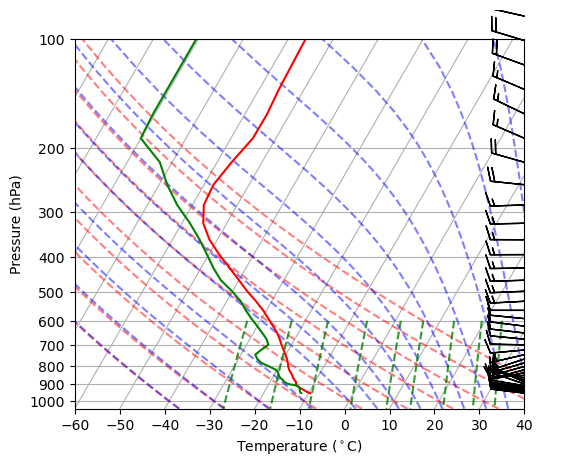

In [41]:
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_xlim(-60, 40)
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_ylabel('Pressure (hPa)')